In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
import statsmodels as stm
df = pd.read_csv('/content/drive/MyDrive/Buying_pattern.csv')
df = df.loc[(df['Quantity'] > 0) & (df['Total_price'] > 0)]

In [ ]:
df['Date-time'] = pd.to_datetime(df['Date-time'])
df.rename(mapper = {'Date-time':'Dates'}, inplace = True, axis=1)
df['Month'] = df['Dates'].dt.month_name()
df['Weekday'] = df['Dates'].dt.day_name()
#df ['Week_num'] = df['Dates'].dt.week
#df.set_index('Dates', inplace = True)
#order=['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],'August','September','October','November','December']

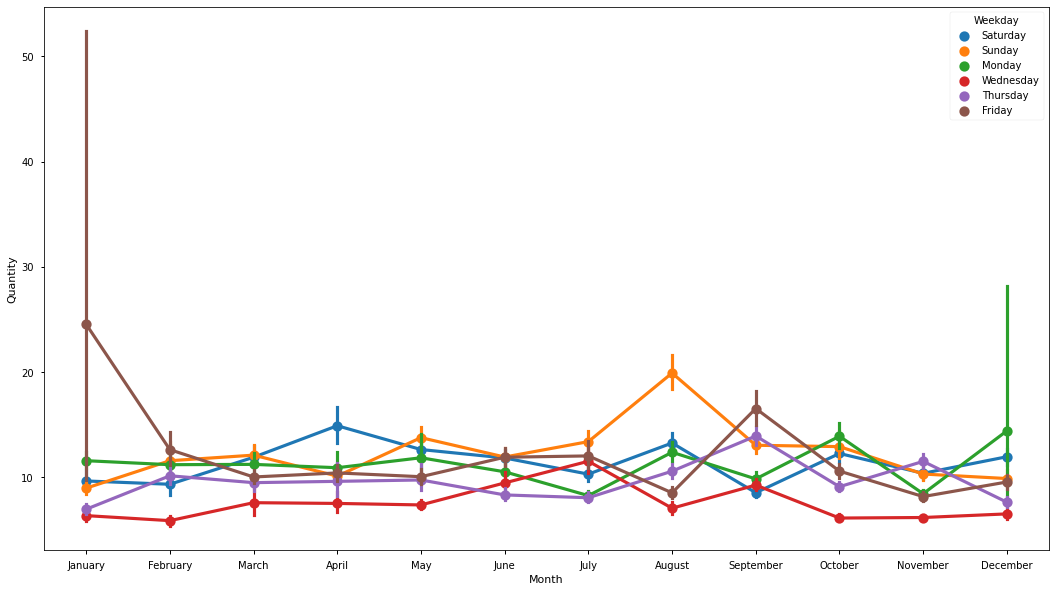

In [ ]:
fig,ax = plt.subplots(figsize= (18,10))
sns.pointplot(data=df, x='Month', y='Quantity', hue = 'Weekday', order=['January','February','March','April',
                                                          'May','June','July','August','September','October','November','December'])

In [ ]:
ax = plt.figure(figsize=(12, 12))
df.head(3)

,Quantity,Total_price,Weekday,Month
Dates,,,,
2018-12-01,8,22,Saturday,December
2018-12-01,6,20,Saturday,December
2018-12-01,6,20,Saturday,December


<Figure size 864x864 with 0 Axes>

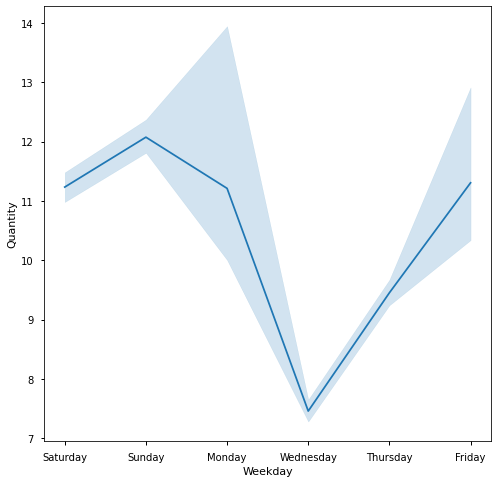

In [ ]:
plt.figure(figsize=(8, 8))
sns.lineplot(y="Quantity", x="Weekday", data=df, sizes=(10,10) )

In [ ]:
df[ 'Quantity'].resample('W').sum()

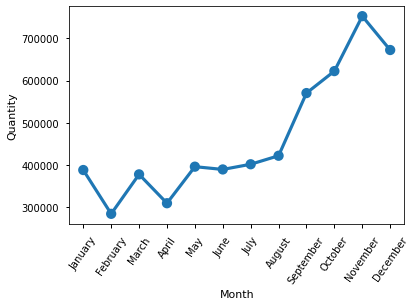

In [ ]:
mf = df.groupby(['Month']).sum()

g = sns.pointplot(y="Quantity", x=mf.index, data=mf ,
                  order=['January','February','March','April','May','June','July','August','September','October','November','December'])
g.set_xticklabels(g.get_xticklabels(), rotation=55);

What are the factors for such steep change in sales quantity in certain months?


In [ ]:
df

,Quantity,Total_price,Weekday,Month
Dates,,,,
2018-12-01,8,22,Saturday,December
2018-12-01,6,20,Saturday,December
2018-12-01,6,20,Saturday,December
2018-12-01,2,15,Saturday,December
2018-12-01,6,26,Saturday,December
...,...,...,...,...
2019-12-09,12,10,Monday,December
2019-12-09,6,13,Monday,December
2019-12-09,4,17,Monday,December


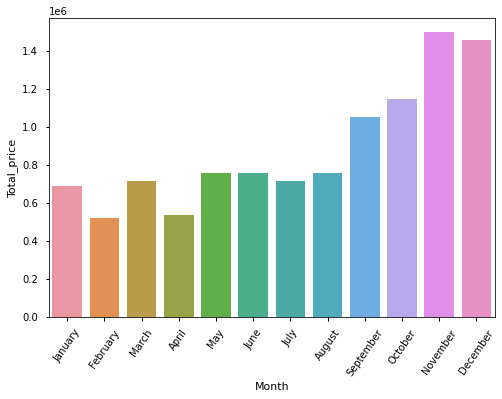

In [ ]:
g = sns.barplot(y='Total_price', 
            x=mf.index,order=['January','February','March','April','May','June','July','August','September','October','November','December'], data=mf)
g.set_xticklabels(g.get_xticklabels(), rotation=55);

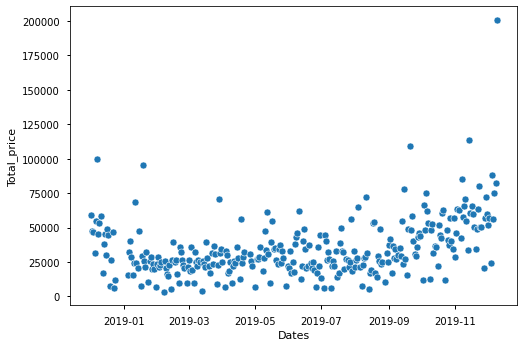

In [ ]:
nf = df.groupby(['Dates'] ).sum()
g = sns.scatterplot(y='Total_price', 
            x=nf.index, data=nf)

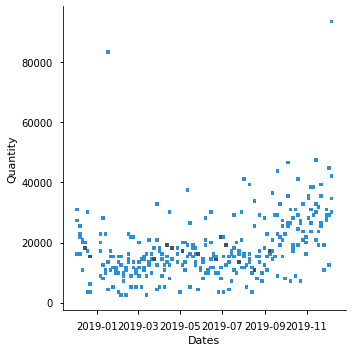

In [ ]:
nf = df.set_index('Dates', inplace = False)
nf = df.groupby(['Dates'] ).sum()
sns.displot(y = 'Quantity' , x =nf.index, data = nf,bins = 100, kind= 'hist')

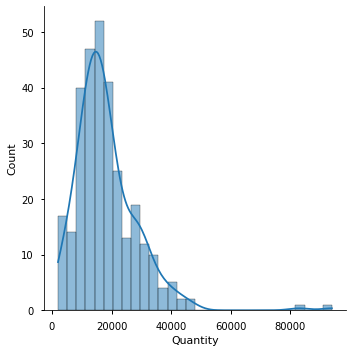

In [ ]:
sns.displot(data = nf, x= 'Quantity', kde = True);

In [ ]:
import collections
def my_mode(sample):
  c = collections.Counter(sample)
  return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

In [ ]:
import statistics as stat

In [ ]:
stat.mode(df['Quantity'])

1

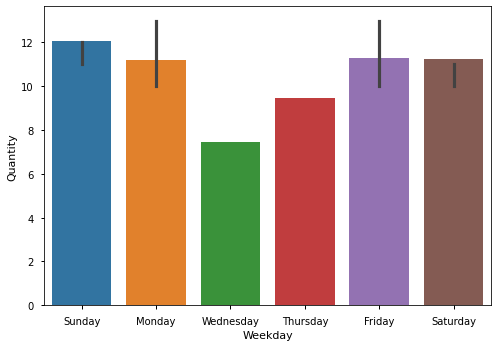

In [ ]:
order = ["Sunday", "Monday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.barplot(x = 'Weekday', y = 'Quantity', order = order, data= df, estimator= stat.mean )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524648 entries, 0 to 540645
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     524648 non-null  int64         
 1   Total_price  524648 non-null  int64         
 2   Dates        524648 non-null  datetime64[ns]
 3   Month        524648 non-null  object        
 4   Weekday      524648 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 44.0+ MB


In [ ]:
df

,Quantity,Total_price,Dates,Month,Weekday
0,8,22,2018-12-01,December,Saturday
1,6,20,2018-12-01,December,Saturday
2,6,20,2018-12-01,December,Saturday
3,2,15,2018-12-01,December,Saturday
4,6,26,2018-12-01,December,Saturday
...,...,...,...,...,...
540641,12,10,2019-12-09,December,Monday
540642,6,13,2019-12-09,December,Monday
540643,4,17,2019-12-09,December,Monday
540644,4,17,2019-12-09,December,Monday


In [ ]:
df['Sales'] = df['Quantity']*df['Total_price']

Prophet Modelling


In [ ]:
sf = df.set_index('Dates')

In [ ]:
sf = sf.groupby('Dates').sum()

In [ ]:
sf.iplot()

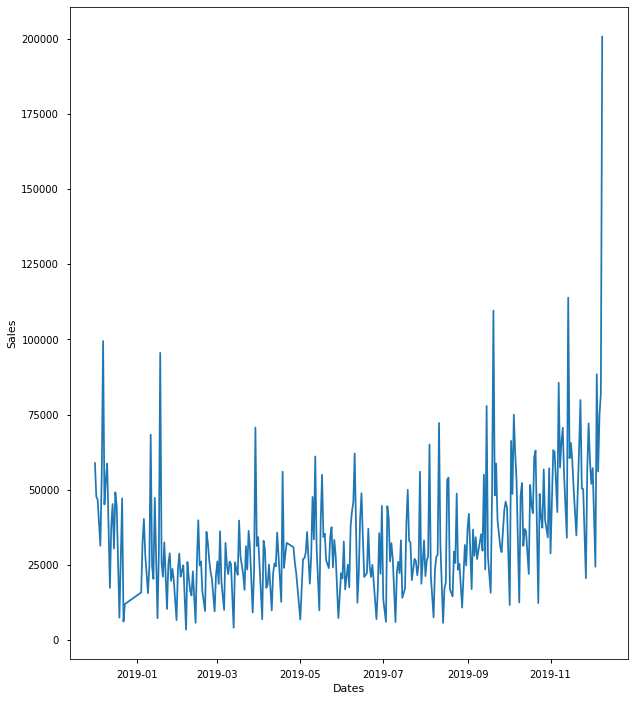

In [ ]:
plt.figure(figsize=(10, 12))
ax = sns.lineplot(y="Total_price", x=sf.index, data=sf)
ax.set(xlabel='Dates', ylabel='Sales');

In [ ]:
from fbprophet import Prophet

In [ ]:
pf = df.groupby('Dates').sum()

In [ ]:
pf

,Quantity,Total_price
Dates,,
2018-12-01,26887,58877
2018-12-02,31315,47732
2018-12-03,16163,46622
2018-12-05,16393,31363
2018-12-06,21770,54869
...,...,...
2019-12-05,44495,88417
2019-12-06,30348,56077
2019-12-07,41834,74769


In [ ]:
pf.to_csv('pf.csv')

In [ ]:
pf = pd.read_csv('/content/pf.csv')

In [ ]:
pf.dtypes

Dates          object
Quantity        int64
Total_price     int64
dtype: object

In [ ]:
pf['Dates'] = pd.to_datetime(pf['Dates'])

In [ ]:
ds = pf.loc[0:274, ['Dates','Total_price']]

In [ ]:
ds.rename(mapper = {'Dates':'ds', 'Total_price':'y'}, inplace = True, axis = 1)

In [ ]:
df.groupby(['Months'] ).mean()

,Start station number,End station number
Months,,
2019-01-01 00:04:48,31203.0,31200.0
2019-01-01 00:06:37,31321.0,31114.0
2019-01-01 00:08:46,31104.0,31323.0
2019-01-01 00:08:47,31281.0,31280.0
2019-01-01 00:12:29,31014.0,31923.0
...,...,...
2019-12-31 23:57:36,31011.0,31009.0
2019-12-31 23:57:47,31125.0,31281.0
2019-12-31 23:59:37,31047.0,31085.0


In [ ]:
fig1 = m.plot(ds);

In [ ]:
m = Prophet(interval_width=0.95,changepoint_prior_scale=2,)  
m.fit(ds)

In [ ]:
future = m.make_future_dataframe(periods=180)
future

In [ ]:
ds.head(3)

,ds,y
0,2018-12-01,58877
1,2018-12-02,47732
2,2018-12-03,46622


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-12-01,54913.925743
1,2018-12-02,61669.987987
2,2018-12-03,52640.451442
3,2018-12-05,33822.906445
4,2018-12-06,50836.574604
...,...,...
450,2020-04-28,84158.800593
451,2020-04-29,73768.362188
452,2020-04-30,92237.913095
453,2020-05-01,99236.374982


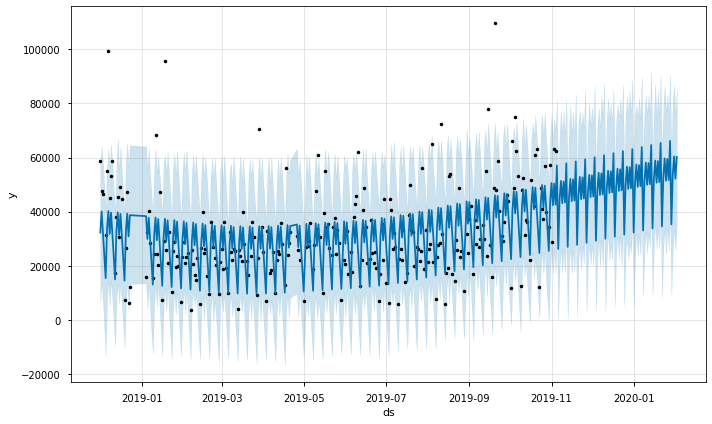

In [ ]:
fig1 = m.plot(forecast)

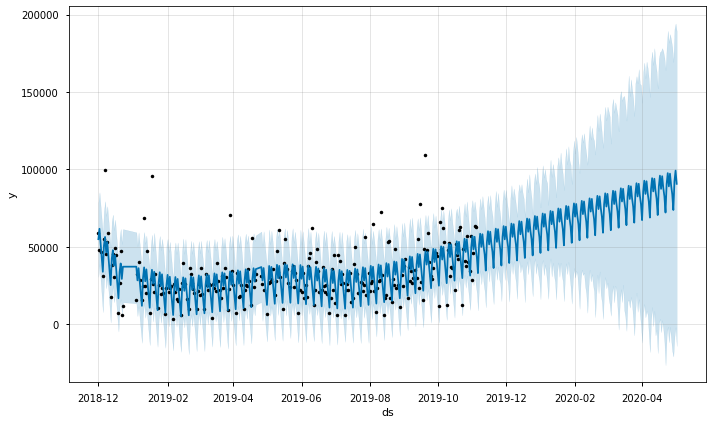

In [ ]:
fig1 = m.plot(forecast)

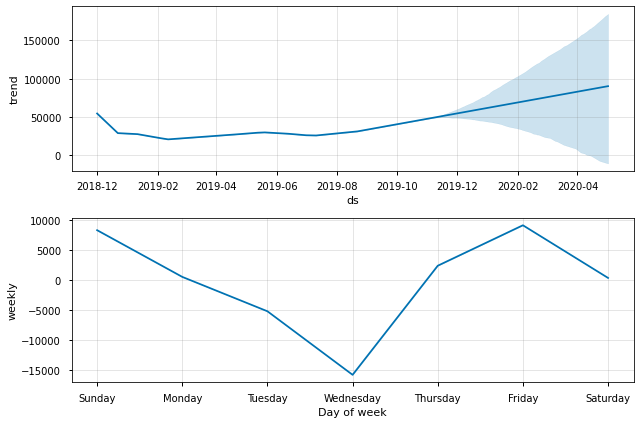

In [ ]:
fig2 = m.plot_components(forecast)